In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('weather_forecast_data.csv')

In [3]:
df=data.copy()
df.head(12)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
5,26.147353,48.217260,15.258547,59.766279,1049.738751,no rain
6,20.939680,40.799444,2.232566,45.827508,1014.173766,no rain
7,32.294325,51.848471,2.873621,92.551497,1006.041733,no rain
8,34.091569,48.057114,5.570206,82.524873,993.732047,no rain
9,19.586038,82.978293,5.760537,98.014450,1036.503457,rain


In [4]:
df.shape

(2500, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [6]:
df.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [7]:
## watching isna values
df.isna().sum()/df.shape[0]*100

Temperature    0.0
Humidity       0.0
Wind_Speed     0.0
Cloud_Cover    0.0
Pressure       0.0
Rain           0.0
dtype: float64

In [8]:
## distinction of features adn targets
features=df.drop('Rain',axis=1)
target=df['Rain']

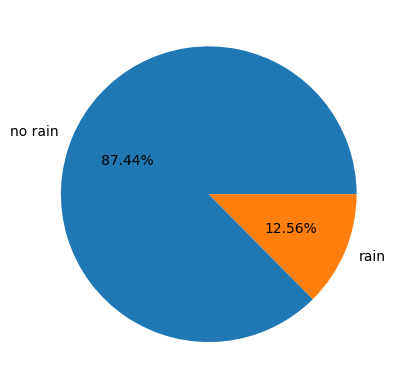

In [9]:
## vizualising target values with piechart
plt.pie(target.value_counts(),labels=target.value_counts().index,autopct='%1.2f%%')
plt.show()


<Axes: >

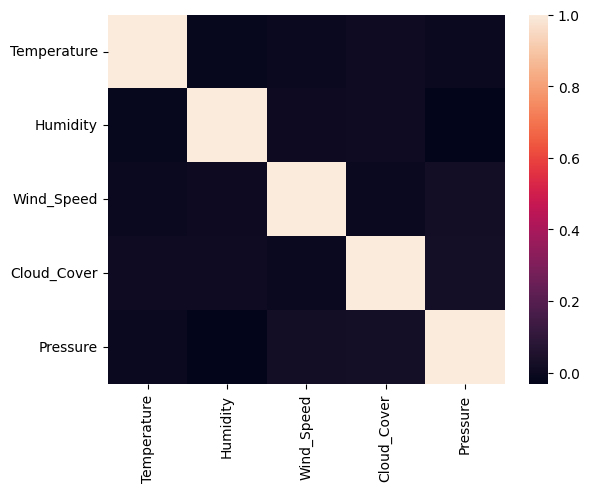

In [10]:
## in features
## visualising coorelation using heatmap
sns.heatmap(data=features.corr())

In [11]:
## tsy lineairement correler

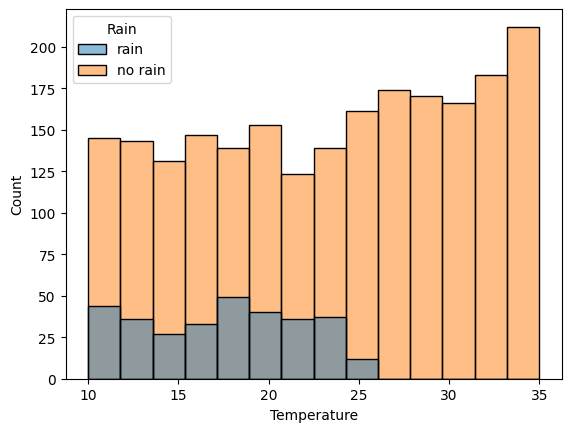

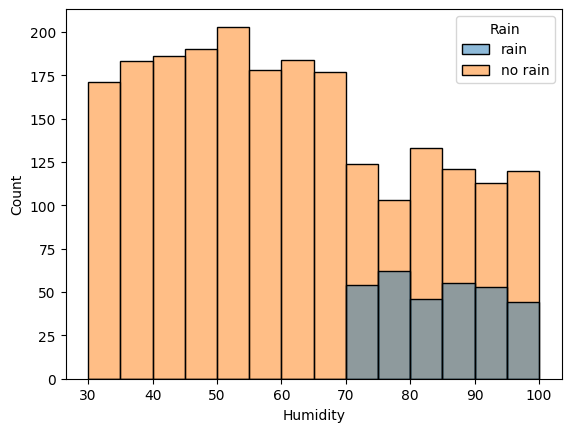

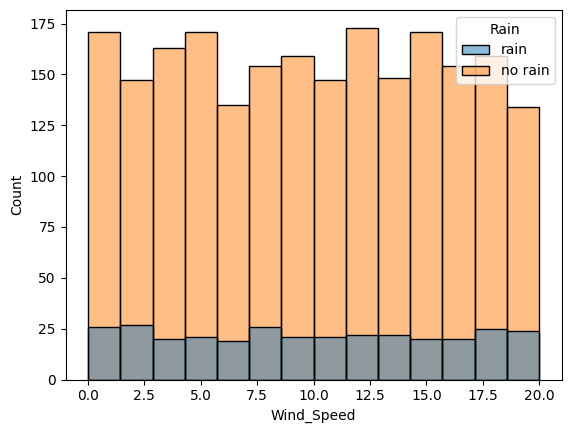

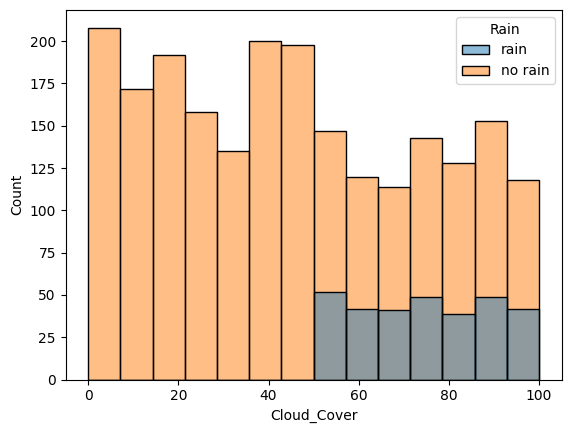

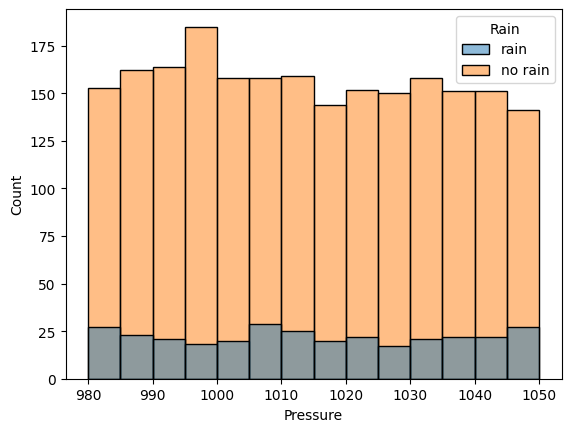

In [12]:
##  relation between features and target
for col in features.columns:
    plt.figure()
    sns.histplot(x=col,data=df,hue="Rain")

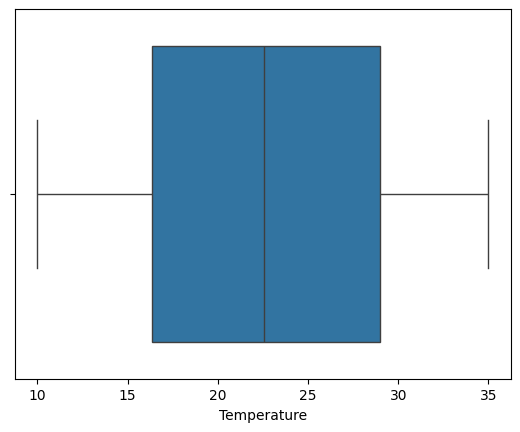

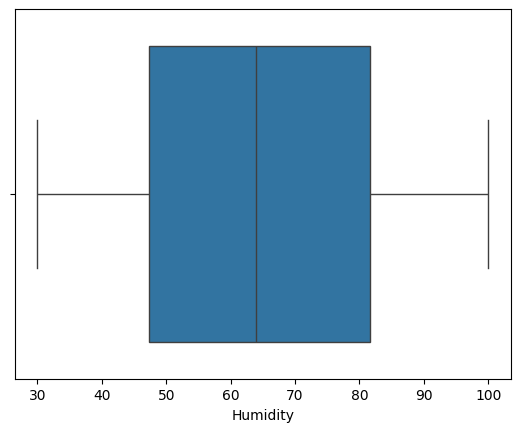

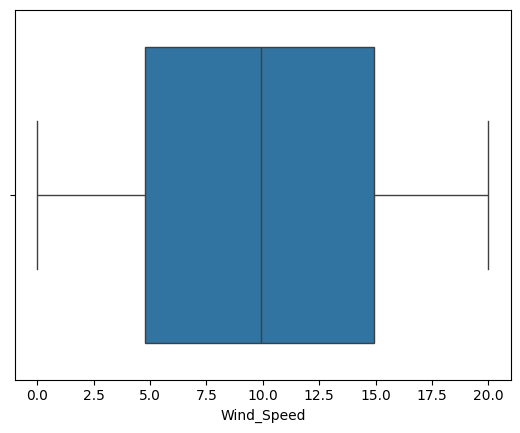

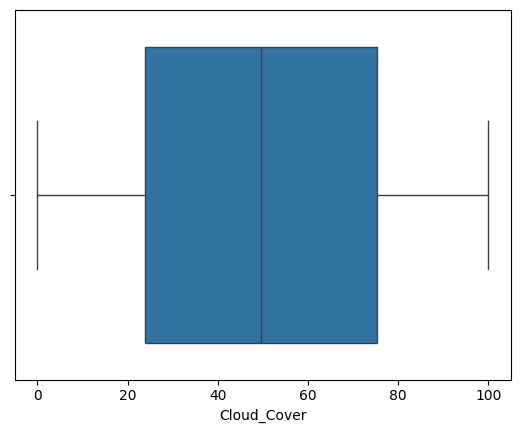

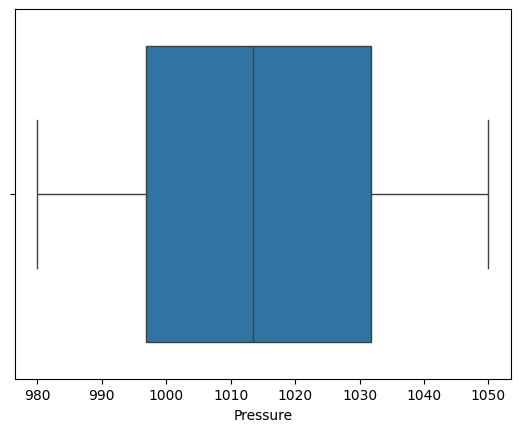

In [13]:
## detecting outliers
for col in features.columns:
    plt.figure()
    sns.boxplot(x=col,data=df)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
## data preprocessing
def Encoding(data):
    data['Rain']=data['Rain'].map({'no rain':0,'rain':1})
    return data

In [16]:
df=Encoding(df)

In [17]:
def datapreprocessing(data):
    scaler=MinMaxScaler()
    data=pd.DataFrame(scaler.fit_transform(data))
    return data

In [18]:
from sklearn.model_selection import train_test_split
## split df
X_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [19]:
X_train=datapreprocessing(X_train)
x_test=datapreprocessing(x_test)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , classification_report

In [21]:
listModel=[LogisticRegression(),KNeighborsClassifier(),SVC(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier()]

In [22]:
for i in listModel:
    model=i
    model.fit(X_train,y_train)
    y_pred=model.predict(x_test)
    print(model)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    ##plotting loss

LogisticRegression()
              precision    recall  f1-score   support

     no rain       0.95      0.97      0.96       443
        rain       0.74      0.60      0.66        57

    accuracy                           0.93       500
   macro avg       0.84      0.78      0.81       500
weighted avg       0.93      0.93      0.93       500

[[431  12]
 [ 23  34]]
KNeighborsClassifier()
              precision    recall  f1-score   support

     no rain       0.99      0.98      0.99       443
        rain       0.88      0.89      0.89        57

    accuracy                           0.97       500
   macro avg       0.93      0.94      0.94       500
weighted avg       0.97      0.97      0.97       500

[[436   7]
 [  6  51]]
SVC()
              precision    recall  f1-score   support

     no rain       0.99      0.99      0.99       443
        rain       0.91      0.91      0.91        57

    accuracy                           0.98       500
   macro avg       0.95      0.9

In [23]:
## learning curve of randomClassifier
from sklearn.model_selection import learning_curve
RandModel=RandomForestClassifier()
RandModel.fit(X_train,y_train)
train_sizes,train_scores,test_scores=learning_curve(RandModel,X_train,y_train,cv=5)

In [36]:
ypredran=RandModel.predict(x_test)
print(classification_report(y_pred,y_test))
print(f1_score(y_test,y_pred))

              precision    recall  f1-score   support

     no rain       1.00      1.00      1.00       444
        rain       0.98      1.00      0.99        56

    accuracy                           1.00       500
   macro avg       0.99      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



ValueError: pos_label=1 is not a valid label. It should be one of ['no rain', 'rain']

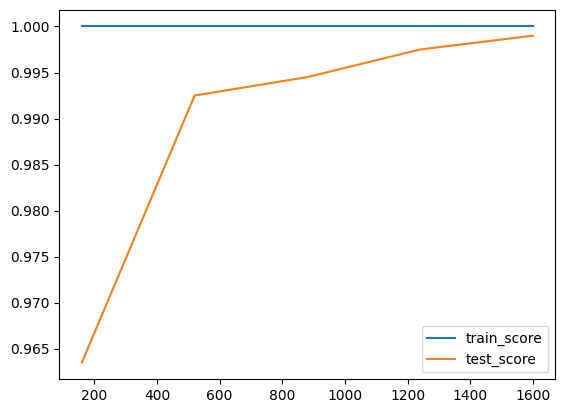

In [24]:
##plot
plt.plot(train_sizes,np.mean(train_scores,axis=1),label='train_score')
plt.plot(train_sizes,np.mean(test_scores,axis=1),label='test_score')
plt.legend()

In [25]:
## save the model
import pickle
pickle.dump(RandModel,open('model.pkl','wb'))

In [26]:
## upload the model
model=pickle.load(open('model.pkl','rb'))

In [33]:
test=np.array([[23,67,54,2,1000]])
print(model.predict(test))

['no rain']
